In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# AUC

In [2]:
import os
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from os import path
import numpy as np


# Hàm này copy và sửa lại từ pytorch
# def get_features_list(features_path, annotation_path):
def get_features_list(annotation_path):    
    # assert os.path.exists(features_path)
    # v_id = 0
    features_list = []
    with open(annotation_path, 'r') as f:
        lines = f.read().splitlines(keepends=False)
        for line in lines:
            start_end_couples = []
            items = line.split()
            anomalies_frames = [int(x) for x in items[3:]]
            start_end_couples.append([anomalies_frames[0], anomalies_frames[1]])
            start_end_couples.append([anomalies_frames[2], anomalies_frames[3]])
            start_end_couples.append([anomalies_frames[4], anomalies_frames[5]])
            start_end_couples.append([anomalies_frames[6], anomalies_frames[7]])
            # start_end_couples = torch.from_numpy(np.array(start_end_couples))
            start_end_couples = np.array(start_end_couples)
            file = items[0].split('.')[0]
            file = file.replace('/', os.sep)
            # feature_path = os.path.join(features_path, file)
            length = int(items[1])
            # features_list.append((feature_path, start_end_couples, length))
            features_list.append((file, start_end_couples, length))
    return features_list

if __name__ == "__main__":
    
    # Path of Pretrained Model score on Testing videos (32 numbers for 32 temporal segments)
    Model_Score_Folder = '/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_topMILLossK_t6_avgtrue'
    
    # Path of Temporal Annotations
    AllAnn_Path = '/content/gdrive/My Drive/DoAnChuyenNganh/AnomalyDetectionCVPR2018-Pytorch/TestAnotation.txt' 
    Anno = get_features_list(AllAnn_Path)

    y_trues = None
    y_preds = None
    
    for file, start_end_couples, length in Anno:
        
        # Read 32 score
        file = file + '.npy'
        path_score = os.path.join(Model_Score_Folder,file)
        #score = np.load(path_score)
        #print(score.shape)
        
        # Compute y_pred
        y_pred = np.load(path_score)
        print(y_pred.shape)
        segment_length = length//32
        # for i in range(32):
        #     if i != 31:
        #         y_pred[segment_length*i:segment_length*(i+1)] = score[i]
        #     else:
        #         y_pred[segment_length*i:] = score[i]
        
        # Compute y_true
        y_true = np.zeros((length))
        for couple in start_end_couples:
            if couple[0] != -1:
                y_true[couple[0]: couple[1]] = 1
        
        # Update y_preds, y_trues
        if y_trues is None:
            y_trues = y_true
            y_preds = y_pred
        else:
            y_trues = np.concatenate((y_trues, y_true))
            y_preds = np.concatenate((y_preds, y_pred))
            
    fpr, tpr, thresholds = roc_curve(y_true=y_trues, y_score=y_preds, pos_label=1)

    plt.figure()
    lw = 2
    roc_auc = auc(fpr, tpr)
    print('roc_auc co lambdata105125125:',roc_auc)
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    if not path.exists('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs'):
        os.mkdir('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs')
    plt.savefig(path.join('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs', 'roc_auc.png'))

(600,)
(5100,)
(600,)
(6390,)
(2370,)
(1500,)
(6000,)
(3546,)
(1500,)
(3979,)
(600,)
(5100,)
(600,)
(1650,)
(600,)
(4247,)
(2702,)
(600,)
(2883,)
(1500,)
(6000,)
(6510,)
roc_auc co lambdata105125125: 0.8011400574730083


(600,)
(5100,)
(600,)
(6390,)
(2370,)
(1500,)
(6000,)
(3546,)
(1500,)
(3979,)
(600,)
(5100,)
(600,)
(1650,)
(600,)
(4247,)
(2702,)
(600,)
(2883,)
(1500,)
(6000,)
(6510,)
(600,)
(5100,)
(600,)
(6390,)
(2370,)
(1500,)
(6000,)
(3546,)
(1500,)
(3979,)
(600,)
(5100,)
(600,)
(1650,)
(600,)
(4247,)
(2702,)
(600,)
(2883,)
(1500,)
(6000,)
(6510,)
(600,)
(5100,)
(600,)
(6390,)
(2370,)
(1500,)
(6000,)
(3546,)
(1500,)
(3979,)
(600,)
(5100,)
(600,)
(1650,)
(600,)
(4247,)
(2702,)
(600,)
(2883,)
(1500,)
(6000,)
(6510,)
(600,)
(5100,)
(600,)
(6390,)
(2370,)
(1500,)
(6000,)
(3546,)
(1500,)
(3979,)
(600,)
(5100,)
(600,)
(1650,)
(600,)
(4247,)
(2702,)
(600,)
(2883,)
(1500,)
(6000,)
(6510,)


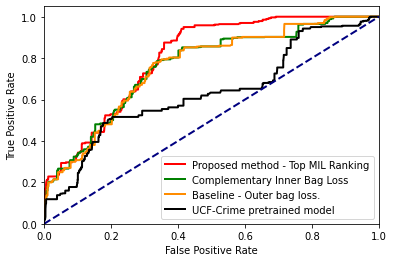

In [ ]:
import os
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from os import path
import numpy as np


# Hàm này copy và sửa lại từ pytorch
# def get_features_list(features_path, annotation_path):
def get_features_list(annotation_path):    
    # assert os.path.exists(features_path)
    # v_id = 0
    features_list = []
    with open(annotation_path, 'r') as f:
        lines = f.read().splitlines(keepends=False)
        for line in lines:
            start_end_couples = []
            items = line.split()
            anomalies_frames = [int(x) for x in items[3:]]
            start_end_couples.append([anomalies_frames[0], anomalies_frames[1]])
            start_end_couples.append([anomalies_frames[2], anomalies_frames[3]])
            start_end_couples.append([anomalies_frames[4], anomalies_frames[5]])
            start_end_couples.append([anomalies_frames[6], anomalies_frames[7]])
            # start_end_couples = torch.from_numpy(np.array(start_end_couples))
            start_end_couples = np.array(start_end_couples)
            file = items[0].split('.')[0]
            file = file.replace('/', os.sep)
            # feature_path = os.path.join(features_path, file)
            length = int(items[1])
            # features_list.append((feature_path, start_end_couples, length))
            features_list.append((file, start_end_couples, length))
    return features_list

if __name__ == "__main__":
    
    # Path of Pretrained Model score on Testing videos (32 numbers for 32 temporal segments)
    Model_Score_Folder = ['/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_topMILLossK_t6_avgtrue','/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predicsoce_npy_Thucnghiem3','/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_newloss_1051_lb1']
    
    # Path of Temporal Annotations
    AllAnn_Path = '/content/gdrive/My Drive/DoAnChuyenNganh/AnomalyDetectionCVPR2018-Pytorch/TestAnotation.txt' 
    Anno = get_features_list(AllAnn_Path)

    fprs = []
    tprs = []
    for i in range(len(Model_Score_Folder)):
      y_trues = None
      y_preds = None
      for file, start_end_couples, length in Anno:
          
          # Read 32 score
          file = file + '.npy'
          path_score = os.path.join(Model_Score_Folder[i],file)
          #score = np.load(path_score)
          #print(score.shape)
          
          # Compute y_pred
          y_pred = np.load(path_score)
          print(y_pred.shape)
          segment_length = length//32
          # for i in range(32):
          #     if i != 31:
          #         y_pred[segment_length*i:segment_length*(i+1)] = score[i]
          #     else:
          #         y_pred[segment_length*i:] = score[i]
          
          # Compute y_true
          y_true = np.zeros((length))
          for couple in start_end_couples:
              if couple[0] != -1:
                  y_true[couple[0]: couple[1]] = 1
          
          # Update y_preds, y_trues
          if y_trues is None:
              y_trues = y_true
              y_preds = y_pred
          else:
              y_trues = np.concatenate((y_trues, y_true))
              y_preds = np.concatenate((y_preds, y_pred))
              
      fpr, tpr, thresholds = roc_curve(y_true=y_trues, y_score=y_preds, pos_label=1)
      fprs.append(fpr)
      tprs.append(tpr)
    y_trues = None
    y_preds = None
    
    for file, start_end_couples, length in Anno:
        
        # Read 32 score
        file = file + '.npy'
        path_score = os.path.join('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/PredictedScore_pretrained',file)
        score = np.load(path_score)
        #print(score.shape)
        
        # Compute y_pred
        y_pred =np.zeros((length))
        print(y_pred.shape)
        segment_length = length//32
        for i in range(32):
            if i != 31:
                y_pred[segment_length*i:segment_length*(i+1)] = score[i]
            else:
                y_pred[segment_length*i:] = score[i]
        
        # Compute y_true
        y_true = np.zeros((length))
        for couple in start_end_couples:
            if couple[0] != -1:
                y_true[couple[0]: couple[1]] = 1
        
        # Update y_preds, y_trues
        if y_trues is None:
            y_trues = y_true
            y_preds = y_pred
        else:
            y_trues = np.concatenate((y_trues, y_true))
            y_preds = np.concatenate((y_preds, y_pred))
            
    fpr1, tpr1, thresholds = roc_curve(y_true=y_trues, y_score=y_preds, pos_label=1)
    fprs.append(fpr1)
    tprs.append(tpr1)
    plt.figure()
    lw = 2
    # roc_auc = auc(fpr, tpr)
    # print('roc_auc co lambdata105125125:',roc_auc)
    plt.plot(fprs[0], tprs[0], color='r', lw=lw, label='Proposed method - Top MIL Ranking')
    plt.plot(fprs[2], tprs[2], color='g', lw=lw, label='Complementary Inner Bag Loss ')
    plt.plot(fprs[1], tprs[1], color='darkorange', lw=lw, label='Baseline - Outer bag loss.')
    plt.plot(fprs[3], tprs[3], color='k', lw=lw, label='UCF-Crime pretrained model')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    if not path.exists('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs'):
        os.mkdir('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs')
    plt.savefig(path.join('/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/graphs', 'roc_auc-total.png'))

Recall

In [ ]:
import os
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from os import path
import numpy as np
# import os
# import numpy as np


# # Hàm này copy và sửa lại từ pytorch
def get_features_list(annotation_path):    
    # assert os.path.exists(features_path)
    # v_id = 0
    features_list = []
    with open(annotation_path, 'r') as f:
        lines = f.read().splitlines(keepends=False)
        for line in lines:
            start_end_couples = []
            items = line.split()
            anomalies_frames = [int(x) for x in items[3:]]
            start_end_couples.append([anomalies_frames[0], anomalies_frames[1]])
            start_end_couples.append([anomalies_frames[2], anomalies_frames[3]])
            start_end_couples.append([anomalies_frames[4], anomalies_frames[5]])
            start_end_couples.append([anomalies_frames[6], anomalies_frames[7]])
            # start_end_couples = torch.from_numpy(np.array(start_end_couples))
            start_end_couples = np.array(start_end_couples)
            file = items[0].split('.')[0]
            file = file.replace('/', os.sep)
            # feature_path = os.path.join(features_path, file)
            length = int(items[1])
            # features_list.append((feature_path, start_end_couples, length))
            features_list.append((file, start_end_couples, length))
    return features_list


if __name__ == "__main__":
    
    # Path of Pretrained Model score on Testing videos (32 numbers for 32 temporal segments)
    Model_Score_Folder = '/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_newloss_lb1_110'
    
    # Path of Temporal Annotations
    AllAnn_Path = '/content/gdrive/My Drive/DoAnChuyenNganh/AnomalyDetectionCVPR2018-Pytorch/TestAnotation.txt' 
    Anno = get_features_list(AllAnn_Path)

    y_preds = None
    y_trues = None
    
    for file, start_end_couples, length in Anno:
        
        if start_end_couples[0][0] == -1:
            continue
        
        # Compute y_true
        y_true = np.zeros((length))
        for couple in start_end_couples:
            if couple[0] != -1:
                y_true[couple[0]: couple[1]] = 1
        
        # Read 32 score
        file = file + '.npy'
        path_score = os.path.join(Model_Score_Folder,file)
        y_pred = np.load(path_score)
        
        # Compute y_pred_extrapolate
        # y_pred = np.zeros((length))
        segment_length = length//32
        # for i in range(32):
        #     if i != 31:
        #         y_pred[segment_length*i:segment_length*(i+1)] = score[i]
        #     else:
        #         y_pred[segment_length*i:] = score[i]
        
        # Update y_preds, y_trues
        if y_preds is None:
            y_preds = y_pred
            y_trues = y_true
        else:
            y_preds = np.concatenate((y_preds, y_pred))
            y_trues = np.concatenate((y_trues, y_true))
            
    FAR = np.sum(y_preds[y_trues==1] > 0.5)/len(y_preds) # Threshold = 0.5 as in the paper
    print('Recall at threshold = 0.5 is:', FAR)
    

Recall at threshold = 0.5 is: 0.0316296411371757


# FAR

In [ ]:
import os
import numpy as np


# Hàm này copy và sửa lại từ pytorch
# def get_features_list(features_path, annotation_path):
def get_features_list(annotation_path):    
    # assert os.path.exists(features_path)
    # v_id = 0
    features_list = []
    with open(annotation_path, 'r') as f:
        lines = f.read().splitlines(keepends=False)
        for line in lines:
            start_end_couples = []
            items = line.split()
            anomalies_frames = [int(x) for x in items[3:]]
            start_end_couples.append([anomalies_frames[0], anomalies_frames[1]])
            start_end_couples.append([anomalies_frames[2], anomalies_frames[3]])
            start_end_couples.append([anomalies_frames[4], anomalies_frames[5]])
            start_end_couples.append([anomalies_frames[6], anomalies_frames[7]])
            # start_end_couples = torch.from_numpy(np.array(start_end_couples))
            start_end_couples = np.array(start_end_couples)
            file = items[0].split('.')[0]
            file = file.replace('/', os.sep)
            # feature_path = os.path.join(features_path, file)
            length = int(items[1])
            # features_list.append((feature_path, start_end_couples, length))
            features_list.append((file, start_end_couples, length))
    return features_list

if __name__ == "__main__":
    
    # Path of Pretrained Model score on Testing videos (32 numbers for 32 temporal segments) # Pretrained
    Model_Score_Folder = '/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_newloss_lb1_110'
    
    # Path of Temporal Annotations
    AllAnn_Path = '/content/gdrive/My Drive/DoAnChuyenNganh/AnomalyDetectionCVPR2018-Pytorch/TestAnotation.txt' 
    Anno = get_features_list(AllAnn_Path)

    y_preds = None
    
    
    for file, start_end_couples, length in Anno:
        
        if start_end_couples[0][0] != -1:
            continue
               
        # Read 32 score
        file = file + '.npy'
        path_score = os.path.join(Model_Score_Folder,file)
        score = np.load(path_score)
        
        # Compute y_pred_extrapolate
        y_pred = np.zeros((length))
        segment_length = length//32
        for i in range(32):
            if i != 31:
                y_pred[segment_length*i:segment_length*(i+1)] = score[i]
            else:
                y_pred[segment_length*i:] = score[i]
        
        # Update y_preds, y_trues
        if y_preds is None:
            y_preds = y_pred
        else:
            y_preds = np.concatenate((y_preds, y_pred))
            
    FAR = np.sum(y_preds > 0.5)/len(y_preds) # Threshold = 0.5 as in the paper
    print('False alarm rate at threshold = 0.5 is:', FAR)
    

False alarm rate at threshold = 0.5 is: 0.0


In [ ]:
import os
import numpy as np


# Hàm này copy và sửa lại từ pytorch
# def get_features_list(features_path, annotation_path):
def get_features_list(annotation_path):    
    # assert os.path.exists(features_path)
    # v_id = 0
    features_list = []
    with open(annotation_path, 'r') as f:
        lines = f.read().splitlines(keepends=False)
        for line in lines:
            start_end_couples = []
            items = line.split()
            anomalies_frames = [int(x) for x in items[3:]]
            start_end_couples.append([anomalies_frames[0], anomalies_frames[1]])
            start_end_couples.append([anomalies_frames[2], anomalies_frames[3]])
            start_end_couples.append([anomalies_frames[4], anomalies_frames[5]])
            start_end_couples.append([anomalies_frames[6], anomalies_frames[7]])
            # start_end_couples = torch.from_numpy(np.array(start_end_couples))
            start_end_couples = np.array(start_end_couples)
            file = items[0].split('.')[0]
            file = file.replace('/', os.sep)
            # feature_path = os.path.join(features_path, file)
            length = int(items[1])
            # features_list.append((feature_path, start_end_couples, length))
            features_list.append((file, start_end_couples, length))
    return features_list

if __name__ == "__main__":
    
    # Path of Pretrained Model score on Testing videos (32 numbers for 32 temporal segments) # Pretrained
    Model_Score_Folder = '/content/gdrive/My Drive/DoAnChuyenNganh/HumanBehaviorBKU/Result/Predict_Score_topMILLoss_1_beforetune'
    
    # Path of Temporal Annotations
    AllAnn_Path = '/content/gdrive/My Drive/DoAnChuyenNganh/AnomalyDetectionCVPR2018-Pytorch/TestAnotation.txt' 
    Anno = get_features_list(AllAnn_Path)

    y_preds = None
    
    
    for file, start_end_couples, length in Anno:
        
        if start_end_couples[0][0] != -1:
            continue
               
        # Read 32 score
        file = file + '.npy'
        path_score = os.path.join(Model_Score_Folder,file)
        #score = np.load(path_score)
        
        # Compute y_pred_extrapolate
        y_pred = np.load(path_score)
        #segment_length = length//32
        #for i in range(32):
            #if i != 31:
                #y_pred[segment_length*i:segment_length*(i+1)] = score[i]
            #else:
                #y_pred[segment_length*i:] = score[i]
        
        # Update y_preds, y_trues
        if y_preds is None:
            y_preds = y_pred
        else:
            y_preds = np.concatenate((y_preds, y_pred))
            
    FAR = np.sum(y_preds > 0.5)/len(y_preds) # Threshold = 0.5 as in the paper
    print('False alarm rate at threshold = 0.5 is:', FAR)
    

False alarm rate at threshold = 0.5 is: 0.0
